<a href="https://colab.research.google.com/github/jackyhuynh/data_mining_using_python/blob/main/script1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Truc huynh

### Material:
- [Pandas - Filter row and columns](https://python.plainenglish.io/filtering-rows-and-columns-in-pandas-python-techniques-you-must-know-6cdfc32c614c)
- [Pandas - Drop multiple columns](https://pythonexamples.org/pandas-dataframe-delete-column/#5)
- [Pandas - Check Pandas data type](https://datascientyst.com/check-dtype-column-columns-pandas-dataframe/#:~:text=%20How%20to%20Check%20the%20Dtype%20of%20Column,Check%20if%20column%20is%20numeric%2C%20dateti...%20More%20)
- [Data - Columns Views - Original Data](https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents)
- [Pandas - Convert value in columns](https://stackoverflow.com/questions/52317459/python-pandas-convert-single-value-in-object-column)
- [Time Ranges/ Time Comparision](https://pythonawesome.com/time-ranges-with-python/)
- [Remove columns or Rows in Pandas](https://www.bing.com/search?q=remove+column+from+pandas&cvid=0b68a851c23b4a55abbb755ec28ca2f6&aqs=edge..69i57j0l7j69i64.8187j0j1&pglt=931&FORM=ANNTA1&PC=U531)
- [Remove rows with certain citeria in Python Pandas](https://stackoverflow.com/questions/42125131/delete-row-based-on-nulls-in-certain-columns-pandas)
- [AI BOOKS](http://aima.cs.berkeley.edu/)
- https://towardsdatascience.com/gentle-start-to-natural-language-processing-using-python-6e46c07addf3
- https://monkeylearn.com/keyword-extraction/
- https://www.justintodata.com/use-nlp-in-python-practical-step-by-step-example/
- https://mathdatasimplified.com/

In [151]:
# Data Pre-Processing - Job listing Dataset 
# Import necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import json
import os
import gc # For garbage collection when deal with memory


In [152]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [153]:
os.getcwd()

'/content'

# Goal: Top 3 Career choices, success factor (example Salaries growth, location, etc as per AI Attributes)

## Job Data Analyst

### Read Data:

In [154]:
# FileNames is a list with the names of the csv files contained in the 'dataset' path
def get_file_names(path):
  filenames = []
  for file in os.listdir(path):
    if file.endswith('.csv'):
      filenames.append(file)
  return filenames

# function that reads the file from the FileNames list and makes it become a dataFrame
def GetFile(fnombre, path):
  location = path + fnombre
  df = pd.read_csv(location)
  return df

file_path_job = './drive/MyDrive/datasets/jobposting/'
# combine all the data frame as one using list complehesion
dfjob = pd.concat([GetFile(file, file_path_job) for file in get_file_names(file_path_job)])

In [155]:
dfjob.shape

(300000, 22)

### Attributes Validation:

In [156]:
dfjob['salary_formatted'].value_counts()

$15 an hour                 2136
From $15 an hour            1441
$15 - $20 an hour           1273
$17 an hour                 1246
$16 an hour                 1188
                            ... 
$64,000 - $80,000 a year       1
$15.00 - $17.64 an hour        1
$40 - $75 a day                1
$3,092 - $3,762 a month        1
$32,176 - $47,316 a year       1
Name: salary_formatted, Length: 20577, dtype: int64

In [157]:
dfjob['region'].value_counts()
# Remove because there are all missing value here

EU          3510
AS          2761
SA          1863
AF           900
OC           505
Americas      54
Name: region, dtype: int64

In [158]:
dfjob['qualifications'].value_counts()
# Can't remove because need this for further basic qualification
# Convert the NAN to 'No requirement'

["US work authorization (Required)"]                                                                                                                2930
["US work authorization (Preferred)"]                                                                                                               2089
["High school or equivalent (Preferred)"]                                                                                                           2001
["Driver's License (Required)"]                                                                                                                      973
["Bachelor's (Preferred)"]                                                                                                                           960
                                                                                                                                                    ... 
["HVAC Certification (Required)","US work authorization (Required)","Secret (Requi

In [159]:
dfjob['benefits'].value_counts()

["Health insurance"]                                                                                                                                                                                                                                                                5325
["Flexible schedule"]                                                                                                                                                                                                                                                               2717
["401(k)","Dental insurance","Health insurance","Paid time off","Vision insurance"]                                                                                                                                                                                                 1873
["Paid time off"]                                                                                                                                            

In [160]:
# Remove src name
dfjob['srcname'].isnull().sum()

193418

In [161]:
dfjob['country'].value_counts()

US    300000
Name: country, dtype: int64

In [162]:
dfjob['country_code'].value_counts()

US    282417
BR       800
GB       681
CO       668
CA       612
       ...  
CF         1
BY         1
ZM         1
MD         1
UG         1
Name: country_code, Length: 166, dtype: int64

In [163]:
dfjob['company_name'].value_counts()

Deloitte                                 3804
ASSURANCE Independent Agents             1774
Amazon.com Services LLC                  1401
Aya Healthcare                           1224
Soliant                                  1075
                                         ... 
Ardent Counseling Center                    1
Mobile Management llc                       1
Duro Electric                               1
CareerStaff Unlimited - Nashville, TN       1
Sanel Corp                                  1
Name: company_name, Length: 97715, dtype: int64

In [164]:
dfjob['company_link'].value_counts()

https://www.indeed.com/cmp/The-Est%C3%A9e-Lauder-Companies-1?campaignid=vjcmpinfo&from=vjcmpinfo&tk=1g54cpcg728qo000&fromjk=00009f127a9e34a7              1
https://www.indeed.com/cmp/Holistic-Healing-Collective?campaignid=vjcmpinfo&from=vjcmpinfo&tk=1g54t7pg6pkej800&fromjk=96522f26f3a8fcba                    1
https://www.indeed.com/cmp/United-Premier?campaignid=vjcmpinfo&from=vjcmpinfo&tk=1g54t62jeq072800&fromjk=96524389f8fbf9ac                                 1
https://www.indeed.com/cmp/Temp-Experts?campaignid=vjcmpinfo&from=vjcmpinfo&tk=1g54t5uj7t48o800&fromjk=965241afe500d938                                   1
https://www.indeed.com/cmp/Kum-&-Go?campaignid=vjcmpinfo&from=vjcmpinfo&tk=1g54t6r8lq051800&fromjk=96523fc6ef1ed652                                       1
                                                                                                                                                         ..
https://www.indeed.com/cmp/Trugreen?campaignid=vjcmpinfo&from=vj

In [165]:
dfjob.head()

,jobid,apply_link,company_link,company_name,company_rating,company_reviews_count,country,country_code,current_url,date_posted,...,description_text,domain,job_title,job_type,location,region,salary_formatted,benefits,qualifications,srcname
0,00009f127a9e34a7,https://www.indeed.com/applystart?jk=00009f127...,https://www.indeed.com/cmp/The-Est%C3%A9e-Laud...,The Estée Lauder Companies,4.0,2214.0,US,US,https://www.indeed.com/viewjob?jk=00009f127a9e...,22 days ago,...,The Treasury Analyst will assist the Treasury ...,www.indeed.com,"Analyst, Treasury – Banking Retail","[""Full-time""]",United States,NaN,NaN,NaN,NaN,NaN
1,0001783849fce183,NaN,"https://www.indeed.com/cmp/H-A-Mapes,-Inc?camp...",Harry's Convenience Stores,NaN,NaN,US,LB,https://www.indeed.com/viewjob?jk=0001783849fc...,30+ days ago,...,At Harry’s the Store Associate / Foodservice A...,www.indeed.com,Store Associate/ Food Service Associate - Saco...,"[""Part-time""]","Lebanon, ME",AS,From $14 an hour,"[""401(k)"",""401(k) matching"",""Dental insurance""...","[""High school or equivalent (Preferred)"",""US w...",NaN
2,00027f45e5373e13,https://www.indeed.com/applystart?jk=00027f45e...,https://www.indeed.com/cmp/Accenture?campaigni...,Accenture,4.0,21827.0,US,US,https://www.indeed.com/viewjob?jk=00027f45e537...,30+ days ago,...,ACCENTURE's Flexible Workforce solves clients’...,www.indeed.com,Cloud Architect,"[""Contract""]",United States,NaN,NaN,NaN,NaN,globalcxaccenture.avature.net
3,00028cda307fcffa,NaN,https://www.indeed.com/cmp/Techo--bloc?campaig...,Techo-Bloc,3.1,114.0,US,AO,https://www.indeed.com/viewjob?jk=00028cda307f...,30+ days ago,...,Company Description\n Why We Want You: Multi...,www.indeed.com,Maintenance Technician - $30+/hr Day Shift (El...,"[""Full-time""]","Angola, IN 46703",AF,From $30 an hour,"[""401(k)"",""Dental insurance"",""Disability insur...",NaN,NaN
4,000002c948819e54,https://www.indeed.com/applystart?jk=000002c94...,https://www.indeed.com/cmp/Michael-Page?campai...,Michael Page,3.5,354.0,US,AU,https://www.indeed.com/viewjob?jk=000002c94881...,30+ days ago,...,Working within the New York office the individ...,www.indeed.com,IT Senior Support Manager,NaN,"Brooklyn, NY",OC,NaN,NaN,NaN,www.michaelpage.com


### Check Missing Values and Clean Up
Truc Report:
- Data cleaning took me a total of more than 8hrs to looks for the approriate data that need to keep or drop.
- All the attributes need to make sense and support the machine learning model
- Data that consider biased will be drop
- Data that is missing need to fix and transform to meaningful data

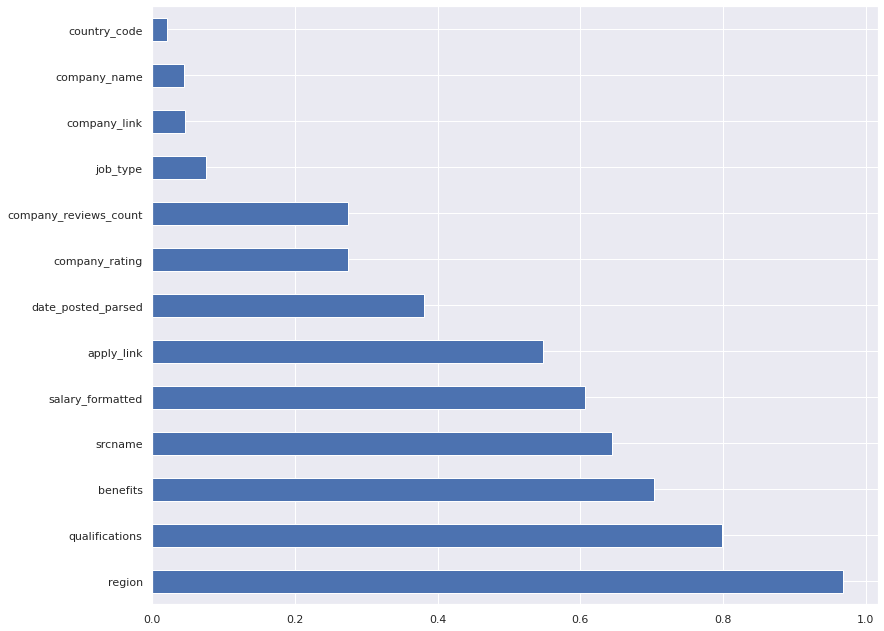

In [166]:
# Set figure size
plt.rcParams["figure.figsize"]=13,11
sns.set(style='darkgrid')

missing_percentage = dfjob.isna().sum().sort_values(ascending=False)/len(dfjob)
missing_percentage[missing_percentage!=0].plot(kind='barh')

In [167]:
list(dfjob.columns)

['jobid',
 'apply_link',
 'company_link',
 'company_name',
 'company_rating',
 'company_reviews_count',
 'country',
 'country_code',
 'current_url',
 'date_posted',
 'date_posted_parsed',
 'description',
 'description_text',
 'domain',
 'job_title',
 'job_type',
 'location',
 'region',
 'salary_formatted',
 'benefits',
 'qualifications',
 'srcname']

In [168]:
dfjob.drop(['jobid','apply_link','company_link','country','current_url','date_posted','date_posted_parsed','domain','region','srcname'],axis=1,inplace=True)

# Out put will be company name and job title
# Remove apply_link because it will not be necessary to have it (we want to analyze the sucessful candidates as well as the current one)
# Apply_link can be removed when the job is filled which is a good sign to analyze these job description (apply_link hold no value)

# Drop the row where the company name or link is blank:
dfjob.dropna(axis=0, how='all',subset=['company_name', 'job_type'], thresh=2, inplace=True) 

# Change null in qualification to no requirement
dfjob['qualifications'] = dfjob['qualifications'].fillna('["No requirement"]')

# Change null in benefits to no benefits 
dfjob['benefits'] = dfjob['benefits'].fillna('["No benefits"]')

# Assume all the mssing value in salary_formated is negotiable (50% of the dataset)
dfjob['salary_formatted'] = dfjob['salary_formatted'].fillna('Negotiable')

# Assume all the missing country is Others
dfjob['country_code']=dfjob['country_code'].fillna('Other')

# Fill in the rating with 0
dfjob['company_rating']=dfjob['company_rating'].fillna(0.0)
dfjob['company_reviews_count']=dfjob['company_reviews_count'].fillna(0.0)

In [169]:
dfjob.shape

# After clean up and drop, we have a new data set of 265633 row and 12attributes

(265633, 12)

### Extended Analyst on the company rating and company review

In [170]:
# Create norating subset that hold the company doesn't has rating
norating = dfjob.loc[dfjob['company_rating']==0]

In [171]:
# Validate the result
norating.head()

,company_name,company_rating,company_reviews_count,country_code,description,description_text,job_title,job_type,location,salary_formatted,benefits,qualifications
1,Harry's Convenience Stores,0.0,0.0,LB,<p>At Harry’s the Store Associate / Foodservic...,At Harry’s the Store Associate / Foodservice A...,Store Associate/ Food Service Associate - Saco...,"[""Part-time""]","Lebanon, ME",From $14 an hour,"[""401(k)"",""401(k) matching"",""Dental insurance""...","[""High school or equivalent (Preferred)"",""US w..."
6,The Michigan Theater Foundation,0.0,0.0,US,"<p>The historic Michigan Theater, located in t...","The historic Michigan Theater, located in the ...","Major Gift Officer, The Michigan Theater Found...","[""Full-time""]","Ann Arbor, MI 48104","$68,000 - $80,000 a year","[""No benefits""]","[""Bachelor's (Required)""]"
11,"Facing History and Ourselves, Inc",0.0,0.0,US,<div>\n <p><b>Position: Director of Developmen...,"Position: Director of Development, Cleveland \...","Director of Development, Cleveland","[""Full-time""]","Cleveland Heights, OH 44118",Negotiable,"[""No benefits""]","[""No requirement""]"
16,The Eye Care Institute,0.0,0.0,US,<p><b>Education and Experience: </b></p>\n<p><...,Education and Experience: Required· Ophthalmic...,Ophthalmic Technician,"[""Full-time""]","Louisville, KY 40206",$16 - $18 an hour,"[""Dental insurance"",""Health insurance"",""On-the...","[""Ophthalmology: 1 year (Required)"",""US work a..."
22,"Copper Whiskey Bar & Grill, Bozeman",0.0,0.0,US,"<p><b>Bar Manager: Copper Whiskey Bar & Grill,...","Bar Manager: Copper Whiskey Bar & Grill, Big S...","Bar Manager: Copper, Big Sky","[""Full-time""]","Tahoe Vista, CA","From $60,000 a year","[""401(k)"",""401(k) matching"",""Dental insurance""...","[""No requirement""]"


In [172]:
# Use value counts to check the name of the company
norating['company_name'].value_counts

# Turn out all the company in this section only post their job one time

<bound method IndexOpsMixin.value_counts of 1                    Harry's Convenience Stores
6               The Michigan Theater Foundation
11            Facing History and Ourselves, Inc
16                       The Eye Care Institute
22          Copper Whiskey Bar & Grill, Bozeman
                          ...                  
29981                                   SunStop
29982    Ford - Lincoln Veteran Careers Program
29988                   Acro Metal Stamping Co.
29992                          Messick and Gray
29997                                Sanel Corp
Name: company_name, Length: 66460, dtype: object>

In [173]:
# Validate if there is any rating associate with the number of user
sum(norating['company_rating']==norating['company_reviews_count'])

66460

In [174]:
# Check the shape of the dataset
norating.shape

(66460, 12)

**Result: **
- Due to all the above analyst, I can conclude the norating consist of the company who only post their job one time. So the change to promote in these company is small due to the amount of jobs posted and rating. There for I will remove the row associate with these company where the change is small and the review is none.

In [175]:
## Delete norating since we do not need it
del norating


In [176]:
# Drop the row where the company name or link is blank:
dfjob = dfjob[(dfjob.company_rating != 0) & (dfjob.company_reviews_count != 0)]

In [177]:
dfjob.head()

,company_name,company_rating,company_reviews_count,country_code,description,description_text,job_title,job_type,location,salary_formatted,benefits,qualifications
0,The Estée Lauder Companies,4.0,2214.0,US,<div>\n <p>The Treasury Analyst will assist th...,The Treasury Analyst will assist the Treasury ...,"Analyst, Treasury – Banking Retail","[""Full-time""]",United States,Negotiable,"[""No benefits""]","[""No requirement""]"
2,Accenture,4.0,21827.0,US,<div></div>\n<div>\n <div>\n <div>\n <b>ACC...,ACCENTURE's Flexible Workforce solves clients’...,Cloud Architect,"[""Contract""]",United States,Negotiable,"[""No benefits""]","[""No requirement""]"
3,Techo-Bloc,3.1,114.0,AO,<div>\n Company Description\n <p><b><br> Why W...,Company Description\n Why We Want You: Multi...,Maintenance Technician - $30+/hr Day Shift (El...,"[""Full-time""]","Angola, IN 46703",From $30 an hour,"[""401(k)"",""Dental insurance"",""Disability insur...","[""No requirement""]"
7,McMahon Associates,3.8,8.0,US,<div>\n <p><b>POSITION SUMMARY:</b></p> \n <p>...,POSITION SUMMARY: \n The Senior Project Engine...,Senior Project Engineer (Transportation - Design),"[""Full-time""]","Camp Hill, PA 17011",Negotiable,"[""No benefits""]","[""No requirement""]"
8,Amazon Kuiper Manufacturing,3.5,82832.0,US,<div>\n <ul>\n <li>BS degree or higher in Ele...,BS degree or higher in Electrical or Computer ...,Design Verification Manager,"[""Full-time""]","Austin, TX",Negotiable,"[""No benefits""]","[""No requirement""]"


In [178]:
dfjob.shape

(199173, 12)

In [179]:
# Open text file resume
file1 = open('./drive/MyDrive/resume.txt', 'r')
resume_data = []  

while True:
    # Get next line from file
    line = file1.readline()
    resume_data.append(line)

    # if line is empty or end of file is reached
    if not line:
        break
    
file1.close()

In [180]:
# Clean up the resume
import re

# Clean up address, school, name, number, take only character in to the new string list
for i in range(0,len(resume_data)):
    resume_data[i] = re.sub(r'\[.*?\]', '', resume_data[i])
    word1 = " ".join(re.findall("[a-zA-Z]+", resume_data[i]))
    resume_data[i] = word1

# Using the keywords dictionary to hold all the keyword
keyword_dict = []

for line in resume_data:
    li = list(line.split(" "))
    for string_ in li:
        keyword_dict.append(string_.lower()) # Convert the string to lower

# Character that does not necessary to the search can be removed
remove_characters = ['','a','truc','huynh','through','self','classroom','ide','concepts','founder','manager','online','first','second','are','was','unsatisfied',
                     'an','to','on','and','that','this','the','by','in','with','s','of','non','co','my','your','his','her','they','their','he','she','it','under',
                     'may','guided','submit','vietnam','cis','any','unsatisfied','services','for','watercraft','specialist','us','recomendation','years','work','team',
                     'customer','ensure','supply','work','year','plans','customer','developing','records','technologies','computer','monitoring','building','market',
                     'ensures','supply','options','learn','master','recommendation','science','risk','strategize','experienced','create','tracking','stock','students',
                     'previous','concerns','structures','budget','next','methods','stakeholders','define','making','profits','achievement','address','routine','installed',
                     'visual','higher','coming','teaching','letters','chain','content','trading','cross','headquarters','audiences','increase','warehouse','loss','car',
                     'advice','highly','shows','toward','commander','compare','fiscal','directly','instructor','reduced','working','project','monitor','learning',
                     'ethical','teach','trade']

soft_skill_remove = ["structure", "experience", "requirements", "worked", "years", "others", "skills", "communication", "ability", "application", "program", "customers",
                     "company", "information", "plan", "knowledge", "benefit", "process", "training", "developed", "assistant", "support", "schedules", "education", 
                     "provided", "business", "operation", "systems", "oriented", "level", "base", "strong", "procedures", "organization", "functional", "practices", 
                     "reports", "office", "people", "certificate", "pay", "industries", "accountable", "staff", "associate", "full", "equipment", "technology", 
                     "maintaining", "design", "record", "clients", "bachelor", "projects", "issues", "using", "relationship", "internal", "technical", "collaborative", 
                     "meet", "implementation", "sales", "background", "detail", "preparing", "lead", "build", "coordination", "monitored", "different", "software", 
                     "marketing", "result", "weeks", "testing", "financial", "security", "proficient", "ensure", "decision", "improve", "engineer", "efficiency", 
                     "driving", "first", "futures", "instruction", "contracts", "strategies", "conducted", "attention", "identified", "analytics", "evaluated"]

for char in remove_characters:
    while(char in keyword_dict) :
        keyword_dict.remove(char)

for char in soft_skill_remove:
    while(char in keyword_dict) :
        keyword_dict.remove(char)

# remove the repeated word in the dictionary
keyword_dict = list(dict.fromkeys(keyword_dict))

# Figure out the length of the keyword dictionaries
len(keyword_dict)

102

In [181]:
def pretty_print(word_list):
  index = 1
  for word in word_list:
    print(word, end=', ')
    if index % 10 == 0:
      print('')
    index += 1

In [182]:
# Display list of dictionary
pretty_print(keyword_dict)

stack, developer, management, analyzing, data, scientist, machine, cyber, introduce, python, 
react, git, docker, web, development, ms, visio, jira, github, slack, 
html, css, json, bootstrap, r, shiny, server, framework, flask, restful, 
api, javascript, heroku, paas, lifecycle, agile, methodologies, visualization, dashboard, bi, 
mining, ml, ai, database, sql, mysql, algorithms, c, java, spring, 
mvc, net, eclipse, studio, vs, code, anaconda, pycharm, jupiter, notebook, 
servlet, apache, tomcat, automation, bot, script, hacking, ui, ux, explaining, 
multitask, virtual, machines, windows, linux, mac, osx, autocad, d, modelling, 
inventory, planning, forecasting, optimization, logistics, teams, prototype, predict, volatility, analyst, 
infrastructure, social, media, compared, logistic, vso, army, medals, vessel, lab, 
coding, research, 

### Other dictionary for references

In [183]:
# # got these keywords by looking at some examples and using existing knowledge.
# tool_keywords1 = ['python', 'pytorch', 'sql', 'mxnet', 'mlflow', 'einstein', 'theano', 'pyspark', 'solr', 'mahout', 
#  'cassandra', 'aws', 'powerpoint', 'spark', 'pig', 'sas', 'java', 'nosql', 'docker', 'salesforce', 'scala', 'r',
#  'c', 'c++', 'net', 'tableau', 'pandas', 'scikitlearn', 'sklearn', 'matlab', 'scala', 'keras', 'tensorflow', 'clojure',
#  'caffe', 'scipy', 'numpy', 'matplotlib', 'vba', 'spss', 'linux', 'azure', 'cloud', 'gcp', 'mongodb', 'mysql', 'oracle', 
#  'redshift', 'snowflake', 'kafka', 'javascript', 'qlik', 'jupyter', 'perl', 'bigquery', 'unix', 'react',
#  'scikit', 'powerbi', 's3', 'ec2', 'lambda', 'ssrs', 'kubernetes', 'hana', 'spacy', 'tf', 'django', 'sagemaker',
#  'seaborn', 'mllib', 'github', 'git', 'elasticsearch', 'splunk', 'airflow', 'looker', 'rapidminer', 'birt', 'pentaho', 
#  'jquery', 'nodejs', 'd3', 'plotly', 'bokeh', 'xgboost', 'rstudio', 'shiny', 'dash', 'h20', 'h2o', 'hadoop', 'mapreduce', 
#  'hive', 'cognos', 'angular', 'nltk', 'flask', 'node', 'firebase', 'bigtable', 'rust', 'php', 'cntk', 'lightgbm', 
#  'kubeflow', 'rpython', 'unixlinux', 'postgressql', 'postgresql', 'postgres', 'hbase', 'dask', 'ruby', 'julia', 'tensor',
# # added r packages doesn't seem to impact the result
#  'dplyr','ggplot2','esquisse','bioconductor','shiny','lubridate','knitr','mlr','quanteda','dt','rcrawler','caret','rmarkdown',
#  'leaflet','janitor','ggvis','plotly','rcharts','rbokeh','broom','stringr','magrittr','slidify','rvest',
#  'rmysql','rsqlite','prophet','glmnet','text2vec','snowballc','quantmod','rstan','swirl','datasciencer']

# # another set of keywords that are longer than one word.
# tool_keywords2 = set(['amazon web services', 'google cloud', 'sql server'])

# # hard skills/knowledge required.
# skill_keywords1 = set(['statistics', 'cleansing', 'chatbot', 'cleaning', 'blockchain', 'causality', 'correlation', 'bandit', 'anomaly', 'kpi',
#  'dashboard', 'geospatial', 'ocr', 'econometrics', 'pca', 'gis', 'svm', 'svd', 'tuning', 'hyperparameter', 'hypothesis',
#  'salesforcecom', 'segmentation', 'biostatistics', 'unsupervised', 'supervised', 'exploratory',
#  'recommender', 'recommendations', 'research', 'sequencing', 'probability', 'reinforcement', 'graph', 'bioinformatics',
#  'chi', 'knn', 'outlier', 'etl', 'normalization', 'classification', 'optimizing', 'prediction', 'forecasting',
#  'clustering', 'cluster', 'optimization', 'visualization', 'nlp', 'c#',
#  'regression', 'logistic', 'nn', 'cnn', 'glm',
#  'rnn', 'lstm', 'gbm', 'boosting', 'recurrent', 'convolutional', 'bayesian',
#  'bayes'])

# # another set of keywords that are longer than one word.
# skill_keywords2 = set(['random forest', 'natural language processing', 'machine learning', 'decision tree', 'deep learning', 'experimental design',
#  'time series', 'nearest neighbors', 'neural network', 'support vector machine', 'computer vision', 'machine vision', 'dimensionality reduction', 
#  'text analytics', 'power bi', 'a/b testing', 'ab testing', 'chat bot', 'data mining'])

# degree_dict = {'bs': 1, 'bachelor': 1, 'undergraduate': 1, 
#                'master': 2, 'graduate': 2, 'mba': 2.5, 
#                'phd': 3, 'ph.d': 3, 'ba': 1, 'ma': 2,
#                'postdoctoral': 4, 'postdoc': 4, 'doctorate': 3}


# degree_dict2 = {'advanced degree': 2, 'ms or': 2, 'ms degree': 2, '4 year degree': 1, 'bs/': 1, 'ba/': 1,
#                 '4-year degree': 1, 'b.s.': 1, 'm.s.': 2, 'm.s': 2, 'b.s': 1, 'phd/': 3, 'ph.d.': 3, 'ms/': 2,
#                 'm.s/': 2, 'm.s./': 2, 'msc/': 2, 'master/': 2, 'master\'s/': 2, 'bachelor\s/': 1}
# degree_keywords2 = set(degree_dict2.keys())

### Sampling

The amount of words is too large, I will reduce the data to 10,000 row so that we can see how our model works on the smaller scale (sample is 5% of the data)

In [184]:
sample_size=10000

# Create a sample of 10,000 rows
dfjob_s = dfjob.sample(n=sample_size)

# Validate the transactions
dfjob_s.head()

,company_name,company_rating,company_reviews_count,country_code,description,description_text,job_title,job_type,location,salary_formatted,benefits,qualifications
3260,Visionworks,3.3,1334.0,US,<p>Summary: Sell eyewear products and services...,Summary: Sell eyewear products and services ut...,Optician/Retail Associate,"[""Part-time""]","Bend, OR 97701",$13 - $17 an hour,"[""No benefits""]","[""Sales: 1 year (Preferred)""]"
9864,"Fulton County, GA",3.6,221.0,US,<p></p>\n<div>\n <div>\n <div>\n <div>\n ...,UNCLASSIFIED POSITION CURRENT VACANC...,CHIEF CLERK/COURT ADMINISTRATOR,"[""Full-time""]","Fulton County, GA",Negotiable,"[""Bereavement leave"",""Disability insurance"",""H...","[""No requirement""]"
11828,Westminster-Canterbury of Lynchburg,3.7,3.0,US,<div>\n Description: \n <p> Full-time position...,Description: \n Full-time position available ...,Care Partner Certified Nurse Aide (CNA) - Days,"[""Full-time""]","Lynchburg, VA 24501",Negotiable,"[""No benefits""]","[""No requirement""]"
4364,Bank of America,3.8,31272.0,US,<div>\n <p><b>Job Description:</b></p>\n <p></...,Job Description: Manages diverse administrat...,Business Support Manager,"[""Full-time""]","Newark, DE 19711",Negotiable,"[""No benefits""]","[""No requirement""]"
23949,Bay Pointe Inn,3.3,10.0,US,<p>We are looking for a Dishwasher to join our...,We are looking for a Dishwasher to join our ki...,Dishwasher,"[""Full-time"",""Part-time""]","Shelbyville, MI 49344",$12 an hour,"[""No benefits""]","[""No requirement""]"


In [185]:
# Has to import NLTK and download averaged_perceptron_tagger
import nltk
from nltk import pos_tag
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [186]:
tags = pos_tag(keyword_dict)

In [187]:
tags_list = []
for tag in tags:
  tags_list.append(tag[1])

tags_list = list(dict.fromkeys(tags_list))

# Figure out the length of the keyword dictionaries
len(tags_list)

8

In [188]:
tags_list

['NN', 'VBG', 'NNS', 'JJ', 'IN', 'VBP', 'RB', 'VBN']

In [189]:
dfjob_s.shape

(10000, 12)

### Apply POS tagging

In [201]:
ps = PorterStemmer()


# process the job description.
def prepare_job_desc(desc):
    # tokenize description.
    tokens = word_tokenize(desc)
        
    # Parts of speech (POS) tag tokens.
    token_tag = pos_tag(tokens)
    
    # Only include some of the POS tags.
    include_tags = ['VBN', 'VBD', 'JJ', 'JJS', 'JJR', 'CD', 'NN', 'NNS', 'NNP', 'NNPS']
    filtered_tokens = [tok for tok, tag in token_tag if tag in include_tags]
    
    # stem words.
    stemmed_tokens = [ps.stem(tok).lower() for tok in filtered_tokens]
    return set(stemmed_tokens)


dfjob_s['job_description_word_set'] = dfjob_s['description_text'].map(prepare_job_desc)

# process the keywords
tool_keywords_set = set([ps.stem(tok) for tok in keyword_dict]) # stem the keywords (since the job description is also stemmed.)
tool_keywords_dict = {ps.stem(tok):tok for tok in keyword_dict} # use this dictionary to revert the stemmed words back to the original.

In [202]:
pretty_print(tool_keywords_set)

web, methodolog, agil, mvc, html, manag, code, slack, rest, databas, 
github, heroku, compar, team, social, ms, analyst, data, dashboard, scientist, 
predict, hack, medal, linux, git, bootstrap, research, armi, vs, script, 
virtual, model, react, media, apach, vessel, d, framework, mine, window, 
json, multitask, java, volatil, tomcat, shini, python, javascript, visual, servlet, 
algorithm, jira, ml, logist, css, spring, machin, lifecycl, explain, paa, 
forecast, r, pycharm, introduc, docker, osx, visio, studio, cyber, api, 
ui, develop, bot, mysql, mac, stack, sql, autocad, bi, flask, 
prototyp, lab, infrastructur, net, autom, analyz, eclips, notebook, anaconda, ux, 
ai, plan, optim, c, inventori, server, vso, jupit, 

In [203]:
tool_list = []

msk = dfjob_s['country_code'] != '' # just in case you want to filter the data.

num_postings = len(dfjob_s[msk].index)
for i in range(num_postings):
    job_desc = dfjob_s[msk].iloc[i]['description_text'].lower()
    job_desc_set = dfjob_s[msk].iloc[i]['job_description_word_set']
    
    # check if the keywords are in the job description. Look for exact match by token.
    tool_words = tool_keywords_set.intersection(job_desc_set)
    
    # label the job descriptions without any tool keywords.
    if len(tool_words) == 0:
        tool_list.append('nothing specified')
    
    tool_list += list(tool_words)

In [204]:
# create the list of tools.
df_tool = pd.DataFrame(data={'cnt': tool_list})
df_tool = df_tool.replace(tool_keywords_dict)

df_tool_top = df_tool['cnt'].value_counts().reset_index().rename(columns={'index': 'tool'}).iloc[:50]


In [205]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

# visualize the tools.
layout = dict(
    title='Top Skill base on Resume',
    yaxis=dict(
        title='% of job postings',
        tickformat=',.0%',
    )
)

fig = go.Figure(layout=layout)
fig.add_trace(go.Bar(
    x=df_tool_top['tool'],
    y=df_tool_top['cnt']/num_postings
))

iplot(fig)

### Find most align 
Using the list just found and find the most 

In [206]:
pretty_print(df_tool_top['tool'])

teams, management, planning, development, data, research, coding, social, modelling, inventory, 
analyzing, machines, database, optimization, automation, ms, nothing specified, agile, visualization, methodologies, 
c, infrastructure, d, lab, web, virtual, analyst, framework, media, windows, 
server, lifecycle, logistic, sql, java, python, forecasting, script, restful, api, 
r, stack, compared, predict, spring, scientist, javascript, linux, dashboard, prototype, 


In [207]:
df_tool_top['grow_percentage'] = df_tool_top['cnt']/sample_size

In [208]:
df_tool_top

,tool,cnt,grow_percentage
0,teams,7024,0.7024
1,management,5813,0.5813
2,planning,4827,0.4827
3,development,4316,0.4316
4,data,2540,0.2540
5,research,1258,0.1258
6,coding,1178,0.1178
7,social,1177,0.1177
8,modelling,1176,0.1176
9,inventory,1085,0.1085


In [209]:
keyword_list_after_clean = list(df_tool_top['tool'])

In [210]:
pretty_print(keyword_list_after_clean)

teams, management, planning, development, data, research, coding, social, modelling, inventory, 
analyzing, machines, database, optimization, automation, ms, nothing specified, agile, visualization, methodologies, 
c, infrastructure, d, lab, web, virtual, analyst, framework, media, windows, 
server, lifecycle, logistic, sql, java, python, forecasting, script, restful, api, 
r, stack, compared, predict, spring, scientist, javascript, linux, dashboard, prototype, 


## Support Functions

In [211]:
# Garage collections
gc.collect()

1248